In [4]:
# Read in the document-term matrix
import pandas as pd

data = pd.read_pickle('dtm.pkl')
data = data.transpose()
data.head()

title,charlottes web,green eggs and ham,go the fuck to sleep,the very hungry caterpillar,peter pan,goodnight moon,flora and ulysses the illuminated adventures,i want my hat back,the velveteen rabbit,winniethepooh winniethepooh 1,...,the bears song,born in the wild baby mammals and their parents,the ology ancient truths ever new,change the world before bedtime,pancakes for breakfast,rise of the earth dragon dragon masters 1,little birdie grows up,you read to me ill read to you very short stories to read together,like pickle juice on a cookie eleanor 1,the enormous egg
abandoned,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
abilities,0,0,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
ability,0,0,0,0,1,3,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
able,2,3,0,1,0,1,5,1,1,1,...,0,0,2,1,1,0,1,1,0,0
able get,0,0,0,0,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0


In [5]:
# Find the top 30 words said by each 
top_dict = {}
for c in range(482):
    top = data.iloc[:,c].sort_values(ascending=False).head(30)
    top_dict[data.columns[c]]= list(zip(top.index, top.values))

top_dict

{'charlottes web': [('story', 26),
  ('first', 24),
  ('life', 21),
  ('child', 19),
  ('web', 19),
  ('remember', 18),
  ('classic', 16),
  ('friendship', 14),
  ('much', 13),
  ('beautiful', 13),
  ('childrens', 12),
  ('still', 12),
  ('year', 11),
  ('would', 11),
  ('movie', 11),
  ('ever', 10),
  ('well', 10),
  ('think', 10),
  ('childhood', 10),
  ('animals', 9),
  ('always', 9),
  ('chapter', 9),
  ('white', 9),
  ('grade', 9),
  ('dont', 9),
  ('many', 8),
  ('old', 8),
  ('back', 8),
  ('thought', 8),
  ('true', 8)],
 'green eggs and ham': [('eggs', 30),
  ('dr', 29),
  ('green', 28),
  ('seuss', 27),
  ('dr seuss', 22),
  ('still', 15),
  ('would', 13),
  ('sam', 12),
  ('first', 11),
  ('many', 11),
  ('best', 10),
  ('words', 10),
  ('child', 9),
  ('try', 9),
  ('daughter', 8),
  ('childrens', 8),
  ('ever', 8),
  ('could', 8),
  ('favourite', 7),
  ('classic', 7),
  ('times', 7),
  ('loves', 6),
  ('sure', 6),
  ('remember', 6),
  ('first book', 6),
  ('every', 6),
  ('

In [6]:
# Print the top 15 words said by each book desctiption
for comedian, top_words in top_dict.items():
    print(comedian)
    print(', '.join([word for word, count in top_words[0:14]]))
    print('---')

charlottes web
story, first, life, child, web, remember, classic, friendship, much, beautiful, childrens, still, year, would
---
green eggs and ham
eggs, dr, green, seuss, dr seuss, still, would, sam, first, many, best, words, child, try
---
go the fuck to sleep
sleep, go, dont, parent, parents, little, ever, get, would, hilarious, kid, every, even, still
---
the very hungry caterpillar
hungry, eric, food, many, story, week, illustrations, child, butterfly, also, much, childrens, simple, picture
---
peter pan
peter, story, disney, never, que, much, also, child, would, de, always, ever, movie, think
---
goodnight moon
bedtime, little, room, childrens, story, many, classic, still, every, moon, times, illustrations, think, memorized
---
flora and ulysses the illuminated adventures
squirrel, story, characters, comic, illustrations, heart, kate, little, quirky, mother, would, funny, could, even
---
i want my hat back
hat, bear, seen, story, rabbit, back, simple, want, illustrations, get, en

In [7]:
# Look at the most common top words --> add them to the stop word list
from collections import Counter

# Let's first pull out the top 30 words for each comedian
words = []
for comedian in data.columns:
    top = [word for (word, count) in top_dict[comedian]]
    for t in top:
        words.append(t)
        
words

['story',
 'first',
 'life',
 'child',
 'web',
 'remember',
 'classic',
 'friendship',
 'much',
 'beautiful',
 'childrens',
 'still',
 'year',
 'would',
 'movie',
 'ever',
 'well',
 'think',
 'childhood',
 'animals',
 'always',
 'chapter',
 'white',
 'grade',
 'dont',
 'many',
 'old',
 'back',
 'thought',
 'true',
 'eggs',
 'dr',
 'green',
 'seuss',
 'dr seuss',
 'still',
 'would',
 'sam',
 'first',
 'many',
 'best',
 'words',
 'child',
 'try',
 'daughter',
 'childrens',
 'ever',
 'could',
 'favourite',
 'classic',
 'times',
 'loves',
 'sure',
 'remember',
 'first book',
 'every',
 'something',
 'dont',
 'gets',
 'story',
 'sleep',
 'go',
 'dont',
 'parent',
 'parents',
 'little',
 'ever',
 'get',
 'would',
 'hilarious',
 'kid',
 'every',
 'even',
 'still',
 'funny',
 'say',
 'good',
 'child',
 'anyone',
 'think',
 'story',
 'never',
 'audio',
 'bedtime',
 'perfect',
 'baby',
 'know',
 'going',
 'version',
 'laughed',
 'hungry',
 'eric',
 'food',
 'many',
 'story',
 'week',
 'illustrat

In [8]:
# Let's aggregate this list and identify the most common words along with how many descriptions they occur in
Counter(words).most_common()

[('story', 390),
 ('illustrations', 341),
 ('little', 228),
 ('would', 206),
 ('also', 180),
 ('picture', 161),
 ('beautiful', 129),
 ('much', 119),
 ('make', 119),
 ('child', 118),
 ('well', 112),
 ('think', 111),
 ('first', 110),
 ('even', 110),
 ('many', 109),
 ('good', 106),
 ('get', 102),
 ('childrens', 96),
 ('picture book', 96),
 ('life', 95),
 ('young', 94),
 ('cute', 94),
 ('see', 85),
 ('text', 80),
 ('new', 77),
 ('words', 76),
 ('back', 74),
 ('day', 74),
 ('old', 69),
 ('still', 68),
 ('animals', 67),
 ('perfect', 67),
 ('simple', 66),
 ('every', 64),
 ('pictures', 64),
 ('find', 60),
 ('readers', 60),
 ('things', 58),
 ('boy', 57),
 ('world', 57),
 ('funny', 56),
 ('family', 56),
 ('im', 55),
 ('girl', 54),
 ('people', 54),
 ('could', 53),
 ('know', 53),
 ('made', 53),
 ('stories', 52),
 ('author', 52),
 ('different', 52),
 ('always', 50),
 ('dont', 49),
 ('makes', 47),
 ('characters', 46),
 ('year', 45),
 ('want', 45),
 ('friends', 45),
 ('two', 45),
 ('never', 44),
 ('h

In [9]:
# If more than 100 descriptions have it as a top word, exclude it from the list
add_stop_words = [word for word, count in Counter(words).most_common() if count > 100]
print(add_stop_words)

#add_stop_words_1 = ['love', 'great', 'books', 'books', 'read', 'reading', 'just', 'like', 'children', 'loved', 'time', 'kids', 'fun', 'really', 'reading', 'way', 'favorite', 'page', 'wonderful']
add_stop_words_2 = ['love', 'great', 'like', 'children', 'books', 'just', 'loved', 'kids', 'time', 'really', 'way', 'child', 'favorite', 'good']

['story', 'illustrations', 'little', 'would', 'also', 'picture', 'beautiful', 'much', 'make', 'child', 'well', 'think', 'first', 'even', 'many', 'good', 'get']


In [10]:
data_clean.head()

NameError: name 'data_clean' is not defined

In [168]:
data.head()

title,charlottes web,green eggs and ham,go the fuck to sleep,the very hungry caterpillar,peter pan,goodnight moon,flora and ulysses the illuminated adventures,i want my hat back,the velveteen rabbit,winniethepooh winniethepooh 1,...,the bears song,born in the wild baby mammals and their parents,the ology ancient truths ever new,change the world before bedtime,pancakes for breakfast,rise of the earth dragon dragon masters 1,little birdie grows up,you read to me ill read to you very short stories to read together,like pickle juice on a cookie eleanor 1,the enormous egg
abandoned,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
abilities,0,0,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
ability,0,0,0,0,1,3,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
able,2,3,0,1,0,1,5,1,1,1,...,0,0,2,1,1,0,1,1,0,0
absolute,1,0,0,0,1,0,1,0,2,0,...,0,0,0,0,0,0,0,0,1,0


In [11]:
# Let's update our document-term matrix with the new list of stop words
from sklearn.feature_extraction import text 
from sklearn.feature_extraction.text import CountVectorizer

# Read in cleaned data
data_clean = pd.read_pickle('data_clean.pkl')

# Add new stop words
add_stop_words_edit = text.ENGLISH_STOP_WORDS.union(add_stop_words_2)

# Recreate document-term matrix
cv = CountVectorizer(stop_words=stop_words)
data_cv = cv.fit_transform(data_clean.review)
data_stop = pd.DataFrame(data_cv.toarray(), columns=cv.get_feature_names())
data_stop.index = data_clean.index

# Pickle it for later use
import pickle
pickle.dump(cv, open("cv_stop.pkl", "wb"))


NameError: name 'stop_words' is not defined

AttributeError: 'CountVectorizer' object has no attribute 'stop'

In [190]:
with open('add_stop.pickle', 'wb') as f:
    # Pickle the 'data' dictionary using the highest protocol available.
    pickle.dump(add_stop_words_edit, f, pickle.HIGHEST_PROTOCOL)

###ask about this stopword situation!!!!

In [1]:
add_stop_words_1 = ['love', 'great', 'books', 'book', 'read', 'reading', 'just', 'like', 'children', 'loved', 'time', 'kids', 'fun', 'really', 'reading', 'way', 'favorite', 'page', 'wonderful']
from nltk.corpus import stopwords
stopwords_ = stopwords.words('english')
stopwords_.extend(add_stop_words_1)

In [2]:
from wordcloud import WordCloud

wc = WordCloud(stopwords=stopwords_, background_color="white", colormap="Dark2",
               max_font_size=150, random_state=42)

In [3]:
# Reset the output dimensions
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [16, 6]

full_names = data.iloc[:,0:12].columns

# Create subplots for each comedian
for index, comedian in enumerate(full_names):
    wc.generate(data_clean.loc[comedian].review)
    
    plt.subplot(3, 4, index+1)
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.title(full_names[index])
    
plt.show()

NameError: name 'data' is not defined

In [172]:
# Find the number of unique words that each comedian uses

# Identify the non-zero items in the document-term matrix, meaning that the word occurs at least once
unique_list = []
for comedian in data.columns:
    uniques = data[comedian].nonzero()[0].size
    unique_list.append(uniques)

# Create a new dataframe that contains this unique word count
data_words = pd.DataFrame(list(zip(data.columns, unique_list)), columns=['book_review', 'unique_words'])
data_unique_sort = data_words.sort_values(by='unique_words', ascending = False)
data_unique_sort.head(50)

/Users/agar/opt/anaconda3/envs/metis/lib/python3.7/site-packages/ipykernel_launcher.py:6: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  


,book_review,unique_words
12,the magicians elephant,1104
6,flora and ulysses the illuminated adventures,1077
36,the little prince,1067
11,last stop on market street,1051
4,peter pan,952
26,julias house for lost creatures,951
19,balloons over broadway the true story of the p...,916
22,the snowy day,915
15,a child of books,873
7,i want my hat back,840


In [176]:
book_df.head()

,Unnamed: 0,description,isbn13,publication_year,image_url,book_id,title,age
0,0,"This beloved book by E. B. White, author of St...",9780064410939,2001.0,https://images.gr-assets.com/books/1439632243m...,24178,Charlotte's Web,19.0
1,0,"""Do you like green eggs and ham?"" asks Sam-I-a...",9780394800165,1988.0,https://images.gr-assets.com/books/1468680100m...,23772,Green Eggs and Ham,32.0
2,0,Go the Fuck to Sleepis a bedtime book for pare...,9781617750250,2011.0,https://images.gr-assets.com/books/1342861907m...,11192642,Go the Fuck to Sleep,9.0
3,0,Eric Carle's The Very Hungry Caterpillaris a p...,9780241003008,1994.0,https://images.gr-assets.com/books/1510184094m...,4948,The Very Hungry Caterpillar,26.0
4,0,"Peter Pan, the book based on J.M. Barrie's fam...",9780805072457,NaN,https://images.gr-assets.com/books/1337714526m...,34268,Peter Pan,NaN


In [173]:
book_df = pd.read_pickle('book_no_duplicates.pkl')

In [175]:
book_df["age"] = 2020 - book_df["publication_year"] 

In [178]:
book_df = book_df.fillna(0)

In [182]:
# Calculate the words per minute of each comedian

# Find the total number of words that a comedian uses
total_list = []
for book in data.columns:
    totals = sum(data[book])
    total_list.append(totals)
    
# Comedy special run times from IMDB, in minutes
age = book_df["age"]

# Let's add some columns to our dataframe
data_words['total_words'] = total_list
data_words['age'] = age
data_words['words_per_year_published'] = data_words['total_words'] / data_words['age']

# Sort the dataframe by words per minute to see who talks the slowest and fastest
data_wpm_sort = data_words.sort_values(by='words_per_year_published')
data_wpm_sort

,book_review,unique_words,total_words,run_times,words_per_minute,age,words_per_year_published
325,please baby please,72,81,30.0,2.700000,30.0,2.700000
431,yo yes,93,122,37.0,3.297297,37.0,3.297297
397,what the ladybug heard,97,115,34.0,3.382353,34.0,3.382353
255,whos on first,147,201,56.0,3.589286,56.0,3.589286
357,bits pieces,169,229,62.0,3.693548,62.0,3.693548
...,...,...,...,...,...,...,...
410,the reluctant dragon,295,486,NaN,NaN,NaN,NaN
425,eieio how old macdonald got his farm with a li...,244,354,NaN,NaN,NaN,NaN
465,who has what all about girls bodies and boys b...,175,241,NaN,NaN,NaN,NaN
475,change the world before bedtime,343,526,NaN,NaN,NaN,NaN


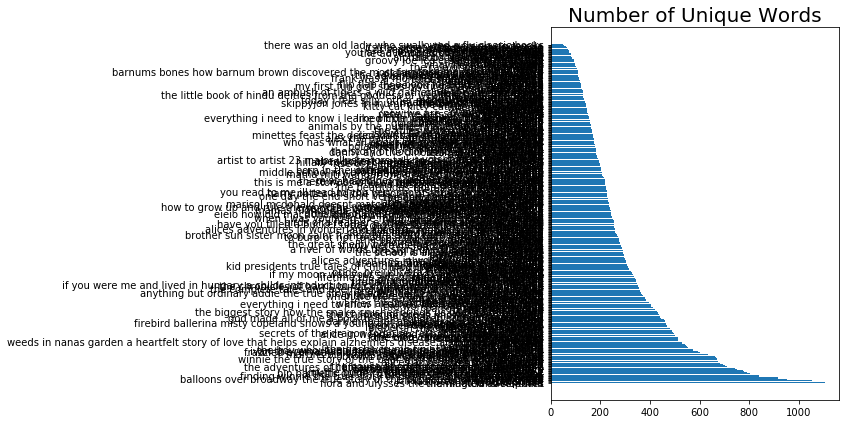

In [197]:
# Let's plot our findings
import numpy as np

y_pos = np.arange(len(data_words))

plt.subplot(1, 2, 1)
plt.barh(y_pos, data_unique_sort.unique_words, align='center')
plt.yticks(y_pos, data_unique_sort.book_review)
plt.title('Number of Unique Words', fontsize=20)

"""
plt.subplot(1, 2, 2)
plt.barh(y_pos, data_wpm_sort.words_per_minute, align='center')
plt.yticks(y_pos, data_wpm_sort.book_review)
plt.title('Number of Words Per Minute', fontsize=20)
"""

plt.tight_layout()
plt.show()